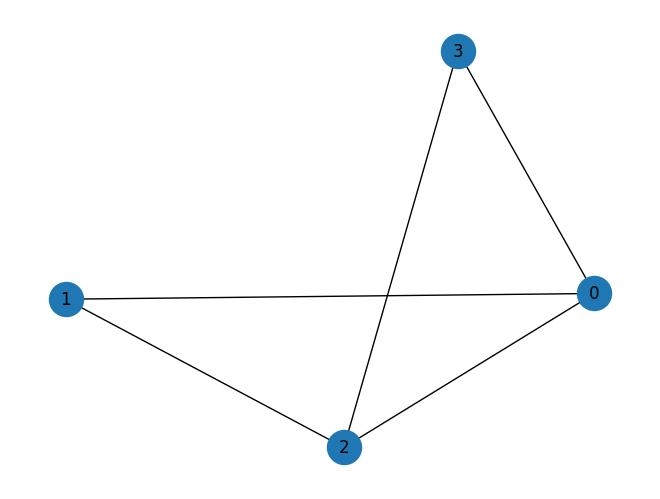

In [1]:
import random
import rustworkx as rx
from rustworkx import is_connected
from rustworkx.visualization import mpl_draw as draw_graph
import numpy as np





def make_default_graph(nodes = 4):
    graph = rx.PyGraph()
    graph.add_nodes_from(np.arange(0,nodes,1))
    edge_list = [(0, 1, 1.0), (0, 2, 2.0), (0, 3, 0.5), (1, 2, 1.0), (2, 3, 1.0)]
    """default:
    graph.add_nodes_from(np.arange(0,nodes,1))
    edge_list = [(0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (1, 2, 1.0), (2, 3, 1.0), (3, 4, 1.0)]"""
    graph.add_edges_from(edge_list)
    return graph

def make_random_graph(nodes = 5):
    default_weight = 1
    graph = rx.PyGraph()
    rng = np.random.default_rng(seed = 173)
    graph.add_nodes_from(np.arange(0,nodes,1))
    edge_list= [(random.randint(0,nodes-1),random.randint(0,nodes-1),1) for _ in range(2*nodes)]
    
    edge_list = [edge for edge in edge_list if (edge[1],edge[0],1.0) not in edge_list] #remove dupes

    
    graph.add_edges_from(edge_list)

    while not is_connected(graph):
        #naive function iteratively adds edges until the graph is connected. can be immensely improved but runs fast enough
        edge = (random.randint(0,nodes-1),random.randint(0,nodes-1),1)
        mirror_edge = (edge[1],edge[0],1.0)

        if edge not in graph.edge_list() and mirror_edge not in graph.edge_list(): #adding, but avoiding dupes
            graph.add_edges_from([(random.randint(0,nodes-1),random.randint(0,nodes-1),1) for _ in range(1)])

    return graph

num_qubits = 4
depth = 2
graph = make_default_graph()


draw_graph(graph, node_size = 600, with_labels = True)

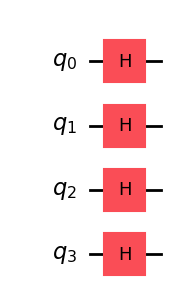

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate
from qiskit.circuit import Parameter

qc = QuantumCircuit(num_qubits)
qc.qubits


def build_circuit(qc, depth = 2, multiangle = False):
    """ Build a circuit."""

    if not multiangle:

        initial_gamma = np.pi
        initial_beta = np.pi/2 #todo change 
        init_params = [(initial_gamma, initial_beta) for _ in range(depth)]

        init_params = [number for tup in init_params for number in tup]

    
    for _ in range(num_qubits): #sjekk len,
        qc.append(
            HGate(),
            [_]
        )

    for i in range(depth):
        
        if multiangle:

            for edge in graph.edge_list():
                
                qc.cx(edge[0], edge[1])
                qc.rz(init_param_c, edge[1])
                qc.cx(edge[0], edge[1])

        else:
            for edge in graph.edge_list():
                qc.cx(edge[0], edge[1])
                qc.rz(init_param_c, edge[1])
                qc.cx(edge[0], edge[1])



build_circuit(qc, False)

qc.draw('mpl')

